
### **Project Title:**

**Food Delivery Efficiency Analysis**

### **Objective:**

To analyze food delivery performance data and identify key factors influencing delivery efficiency and customer satisfaction.

### **Data Description:**

The dataset contains delivery-related attributes such as delivery person details, vehicle condition, customer ratings, restaurant and delivery coordinates, and delivery time.

**Key Columns:**

* `Delivery_person_Age`: Age of the delivery person.
* `Delivery_person_Ratings`: Average rating received by the delivery person.
* `Restaurant_latitude`, `Restaurant_longitude`: Restaurant location.
* `Delivery_location_latitude`, `Delivery_location_longitude`: Customer location.
* `Vehicle_condition`: Condition rating of the delivery vehicle (0–3).
* `multiple_deliveries`: Number of deliveries made in a single trip.
* `Time taken (mins)`: Total time taken to complete the delivery.

### **Analysis Approach:**

1. Data cleaning and preprocessing.
2. Compute delivery distance using geospatial coordinates.
3. Perform exploratory data analysis (EDA) to identify relationships affecting efficiency.
4. Correlation and regression analysis to determine key predictors of delivery time.
5. Summarize insights and propose strategies for improvement.

### **Tools and Libraries:**

Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn (optional for modeling).

### **Expected Outcomes:**

* Insights on how age, ratings, distance, and vehicle condition affect delivery time.
* Identification of patterns to optimize route planning and delivery scheduling.
* Data-driven recommendations for operational improvements.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# Load dataset
df = pd.read_csv("food_delivery3.txt", delimiter="\t")



# Basic cleaning (optional)
df = df.dropna(subset=["Time taken (mins)", "Delivery_person_Age", "Delivery_person_Ratings"])


In [12]:
# Preview
df.head()

,ID,DeliveryPerson_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time taken (mins)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30,11:45,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45,19:50,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8:30,8:45,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00,18:10,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30,13:45,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [13]:
df.columns


Index(['ID', 'DeliveryPerson_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time taken (mins)'],
      dtype='object')

## Delivery Time Analysis

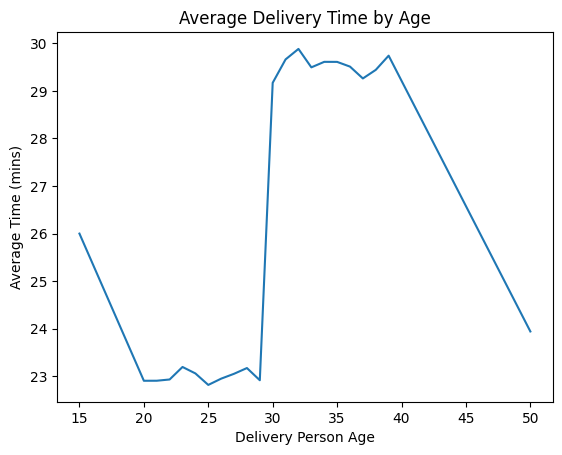

In [14]:
# 1. Average delivery time by delivery person age
age_time = df.groupby("Delivery_person_Age")["Time taken (mins)"].mean()
plt.figure()
age_time.plot(kind="line")
plt.title("Average Delivery Time by Age")
plt.xlabel("Delivery Person Age")
plt.ylabel("Average Time (mins)")
plt.show()

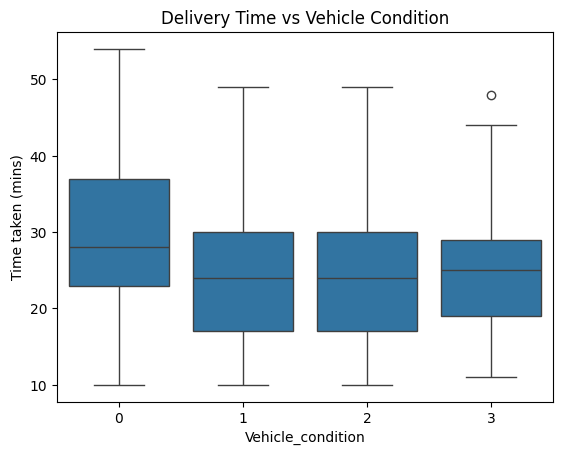

In [15]:
# 2. Correlation between delivery time and vehicle condition
plt.figure()
sns.boxplot(x="Vehicle_condition", y="Time taken (mins)", data=df)
plt.title("Delivery Time vs Vehicle Condition")
plt.show()




In [16]:
corr_vc = df["Vehicle_condition"].corr(df["Time taken (mins)"])
print(f"Correlation between vehicle condition and delivery time: {corr_vc:.2f}")


Correlation between vehicle condition and delivery time: -0.24


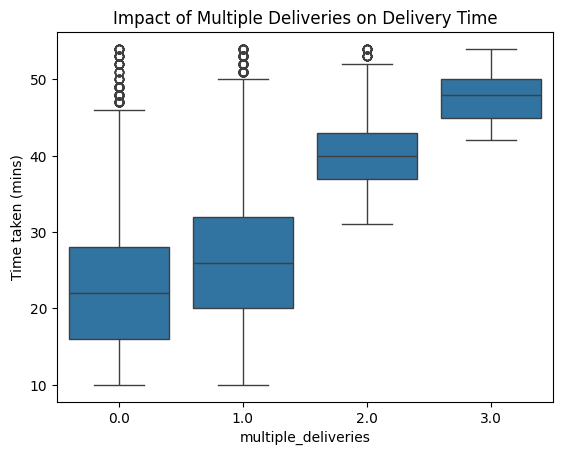

In [17]:
# 3. Impact of multiple deliveries
plt.figure()
sns.boxplot(x="multiple_deliveries", y="Time taken (mins)", data=df)
plt.title("Impact of Multiple Deliveries on Delivery Time")
plt.show()



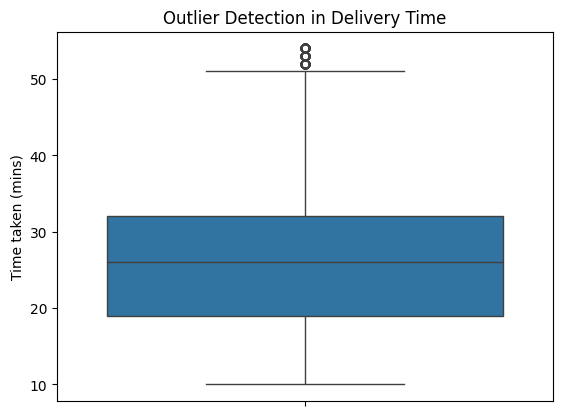

In [18]:
# 4. Outlier detection
plt.figure()
sns.boxplot(y=df["Time taken (mins)"])
plt.title("Outlier Detection in Delivery Time")
plt.show()



In [19]:
# Identify extreme outliers
Q1 = df["Time taken (mins)"].quantile(0.25)
Q3 = df["Time taken (mins)"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df["Time taken (mins)"] > Q3 + 1.5 * IQR]
print(f"Number of outliers: {len(outliers)}")




Number of outliers: 253


## Location / Geographic insight

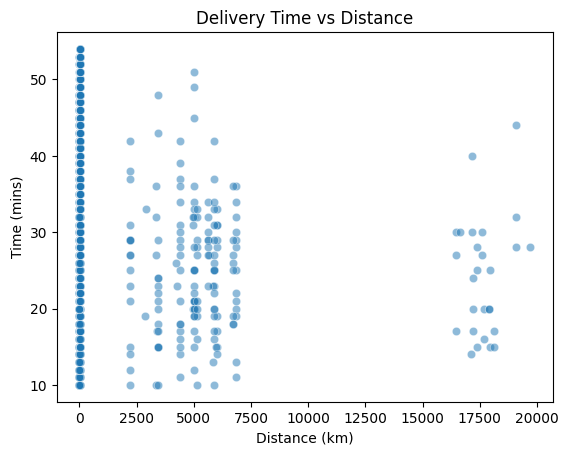

In [20]:
# Compute distance using latitude and longitude
def calc_distance(row):
    rest = (row["Restaurant_latitude"], row["Restaurant_longitude"])
    dest = (row["Delivery_location_latitude"], row["Delivery_location_longitude"])
    return geodesic(rest, dest).km

df["Distance_km"] = df.apply(calc_distance, axis=1)

# 1. Delivery time vs distance
plt.figure()
sns.scatterplot(x="Distance_km", y="Time taken (mins)", data=df, alpha=0.5)
plt.title("Delivery Time vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Time (mins)")
plt.show()



In [21]:
# Correlation
corr_dist = df["Distance_km"].corr(df["Time taken (mins)"])
print(f"Correlation between distance and time: {corr_dist:.2f}")




Correlation between distance and time: -0.01


In [22]:
# 2. Identify high-delay zones
delay_zones = df.groupby(["Delivery_location_latitude", "Delivery_location_longitude"])["Time taken (mins)"].mean().reset_index()
top_delay_zones = delay_zones.sort_values("Time taken (mins)", ascending=False).head(10)
print("Top high-delay zones:")
print(top_delay_zones)

Top high-delay zones:
      Delivery_location_latitude  Delivery_location_longitude  \
2101                   19.990256                    75.433503   
3545                   26.564133                    80.438100   
4320                   31.003244                    75.931817   
3575                   26.599003                    80.446344   
3371                   25.580377                    81.964236   
3548                   26.569108                    80.405042   
2453                   22.534585                    88.413310   
3555                   26.573504                    80.482929   
2991                   23.310791                    77.517020   
2072                   19.964103                    75.458419   

      Time taken (mins)  
2101          54.000000  
3545          52.000000  
4320          51.000000  
3575          50.000000  
3371          50.000000  
3548          48.500000  
2453          48.000000  
3555          47.333333  
2991          47.000000  
20

## Delivery Worker Performance

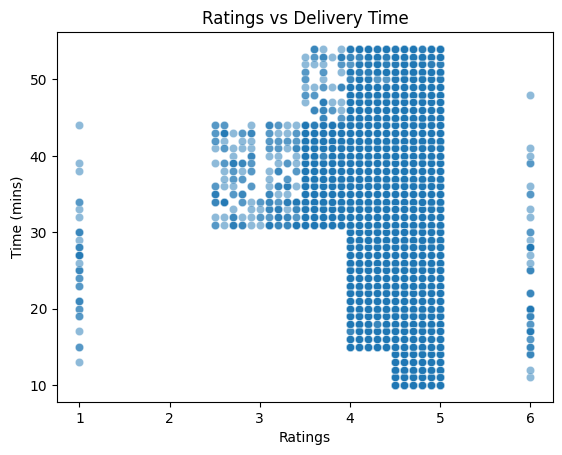

In [23]:
# 1. Ratings vs delivery time
plt.figure()
sns.scatterplot(x="Delivery_person_Ratings", y="Time taken (mins)", data=df, alpha=0.5)
plt.title("Ratings vs Delivery Time")
plt.xlabel("Ratings")
plt.ylabel("Time (mins)")
plt.show()



In [24]:
corr_rate = df["Delivery_person_Ratings"].corr(df["Time taken (mins)"])
print(f"Correlation between ratings and time: {corr_rate:.2f}")



Correlation between ratings and time: -0.34


              Time taken (mins)  multiple_deliveries
Rating_Group                                        
Low                   34.219178             0.903448
Average               36.020453             0.963685
Good                  30.562493             0.825248
Excellent             24.382434             0.704487


/tmp/ipython-input-3407054313.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_group_stats = df.groupby("Rating_Group")[["Time taken (mins)", "multiple_deliveries"]].mean()


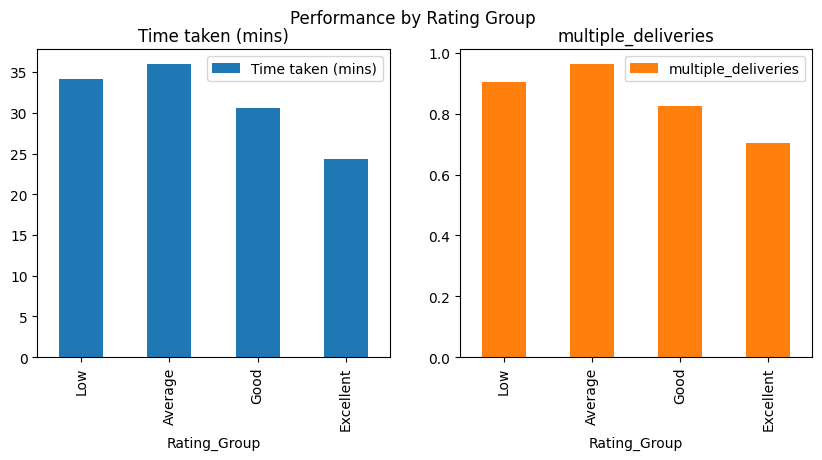

In [25]:
# 2. Segment delivery personnel by rating range
df["Rating_Group"] = pd.cut(df["Delivery_person_Ratings"], bins=[0, 3, 4, 4.5, 5], labels=["Low", "Average", "Good", "Excellent"])
rating_group_stats = df.groupby("Rating_Group")[["Time taken (mins)", "multiple_deliveries"]].mean()
print(rating_group_stats)
rating_group_stats.plot(kind="bar", subplots=True, layout=(1, 2), figsize=(10,4))
plt.suptitle("Performance by Rating Group")
plt.show()


## Operations analysis

                   Time taken (mins)  Delivery_person_Ratings
Vehicle_condition                                            
0                          30.051421                 4.609424
1                          24.360110                 4.649411
2                          24.466396                 4.647018
3                          24.802198                 3.912088


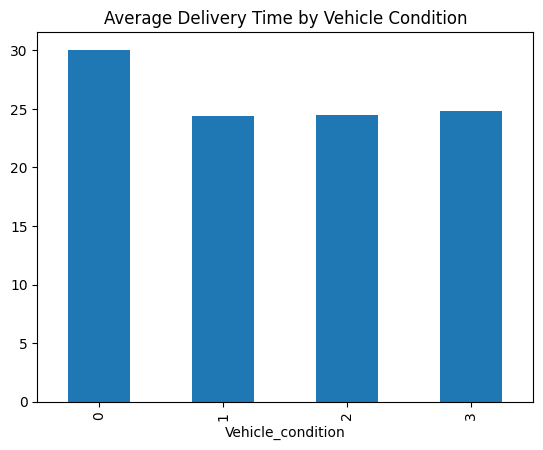

In [26]:
# 1. Vehicle condition trend
vehicle_stats = df.groupby("Vehicle_condition")[["Time taken (mins)", "Delivery_person_Ratings"]].mean()
print(vehicle_stats)

plt.figure()
vehicle_stats["Time taken (mins)"].plot(kind="bar")
plt.title("Average Delivery Time by Vehicle Condition")
plt.show()




                     Time taken (mins)  Delivery_person_Ratings
multiple_deliveries                                            
0.0                          22.859829                 4.669673
1.0                          26.862043                 4.630758
2.0                          40.428646                 4.424882
3.0                          47.800587                 4.526979


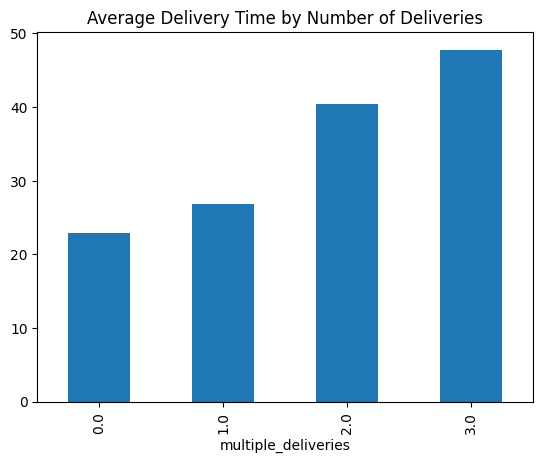

In [27]:
# 2. Multi-delivery efficiency
multi_stats = df.groupby("multiple_deliveries")[["Time taken (mins)", "Delivery_person_Ratings"]].mean()
print(multi_stats)

plt.figure()
multi_stats["Time taken (mins)"].plot(kind="bar")
plt.title("Average Delivery Time by Number of Deliveries")
plt.show()



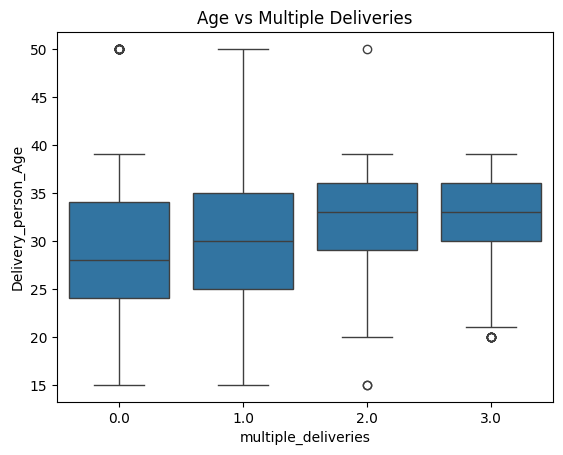

In [28]:
# 3. Age vs multiple deliveries
plt.figure()
sns.boxplot(x="multiple_deliveries", y="Delivery_person_Age", data=df)
plt.title("Age vs Multiple Deliveries")
plt.show()

##



--


## Correlations


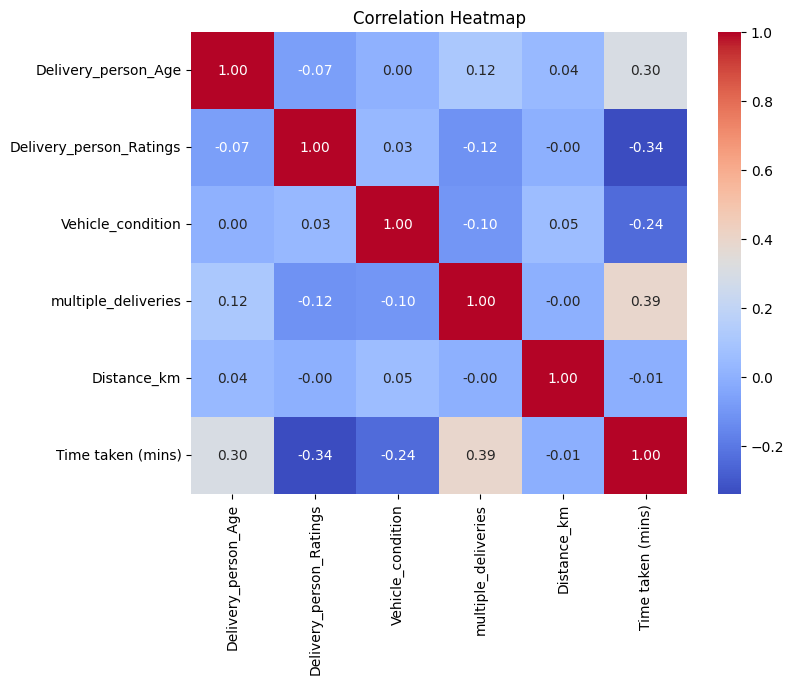

'\n\ncorrelation heatmap for feature relationships and a regression analysis to identify which factors most influence delivery time.\n\n\nWhat to Look For:\n\nStrong positive correlations (close to +1) suggest features that increase delivery time.\n\nStrong negative correlations (close to -1) suggest features that reduce delivery time.\n'

In [29]:
# Select numeric features for correlation
numeric_cols = ["Delivery_person_Age", "Delivery_person_Ratings", "Vehicle_condition",
                "multiple_deliveries", "Distance_km", "Time taken (mins)"]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


"""

correlation heatmap for feature relationships and a regression analysis to identify which factors most influence delivery time.


What to Look For:

Strong positive correlations (close to +1) suggest features that increase delivery time.

Strong negative correlations (close to -1) suggest features that reduce delivery time.
"""

## Regression Analysis

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error



In [33]:
# Prepare features (X) and target (y)
features = ["Delivery_person_Age", "Delivery_person_Ratings", "Vehicle_condition",
            "multiple_deliveries", "Distance_km"]

df1 = df.dropna()
X = df1[features]
y = df1["Time taken (mins)"]



In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)



In [35]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f} minutes")




R² Score: 0.340
Mean Absolute Error: 6.04 minutes


                   Feature  Coefficient
3      multiple_deliveries     4.930340
0      Delivery_person_Age     0.372963
4              Distance_km    -0.000026
2        Vehicle_condition    -2.240723
1  Delivery_person_Ratings    -8.460986


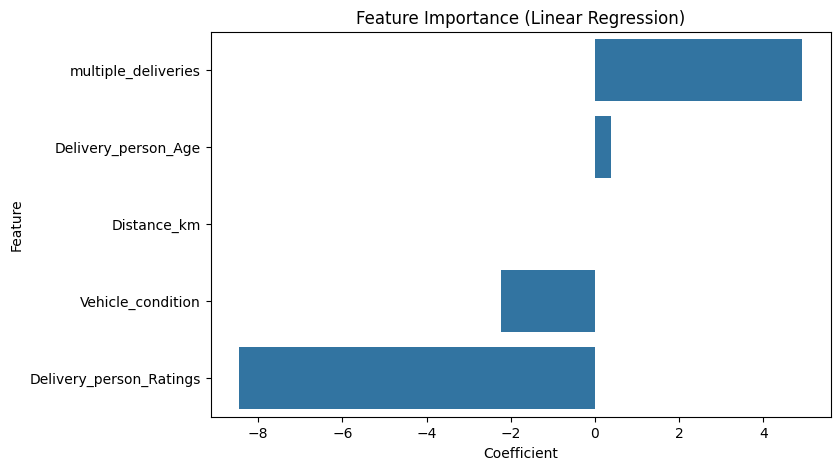

In [36]:
# Coefficients (feature importance)
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coefficients)
plt.title("Feature Importance (Linear Regression)")
plt.show()